# Functional Text Extraction 
## Summary
In this notebook, we will go over some of the tools that can be used to extract text from various formats. Text will be extracted from PDFs, docx and tables embedded in PDF documents. The techniques in this notebook are just some of many that exist but should provide a basic flow for how to do this sort of work to structure unstructured data for use in a database or other friendly format. 

## Introduction
Often, storage formats selected by non-technical users do not conform to good practices for sharing or long term storage. For this reason, there are many different tools that have been developed in languages like Python that can help us pull data out of these unfriendly formats. 

PDFs are often selected as a storage format as PDFs are a portable format. This means that a PDF generated on one machine will always look the same on a second computer regardless of how it was generated or how it is being viewed. Especially with the advent of the PDF/A (PDF/archive) format, people use PDFs as a means for long term storage of critical data.  

This howerver, results in a lot of headaches for developers. PDFs, by nature, are often flattened and can be inaccessible to machines. In some instances, they are essentially flat images stored as PDFs that cannot be read by a machine. In other cases, they are machine readable but can be difficult to work with. 

## Purpose
I have had to use many of these techniques in order to structure unstructured data for work. The end goal usually was to get the data into a state where I could share it with an end user or get the data uploaded into a database. 

## The Basic Flow
The hardest part of working with PDFs is getting the data out of the PDFs. 

This is the basic flow of how I usually approach any PDF that I have to extract data from:

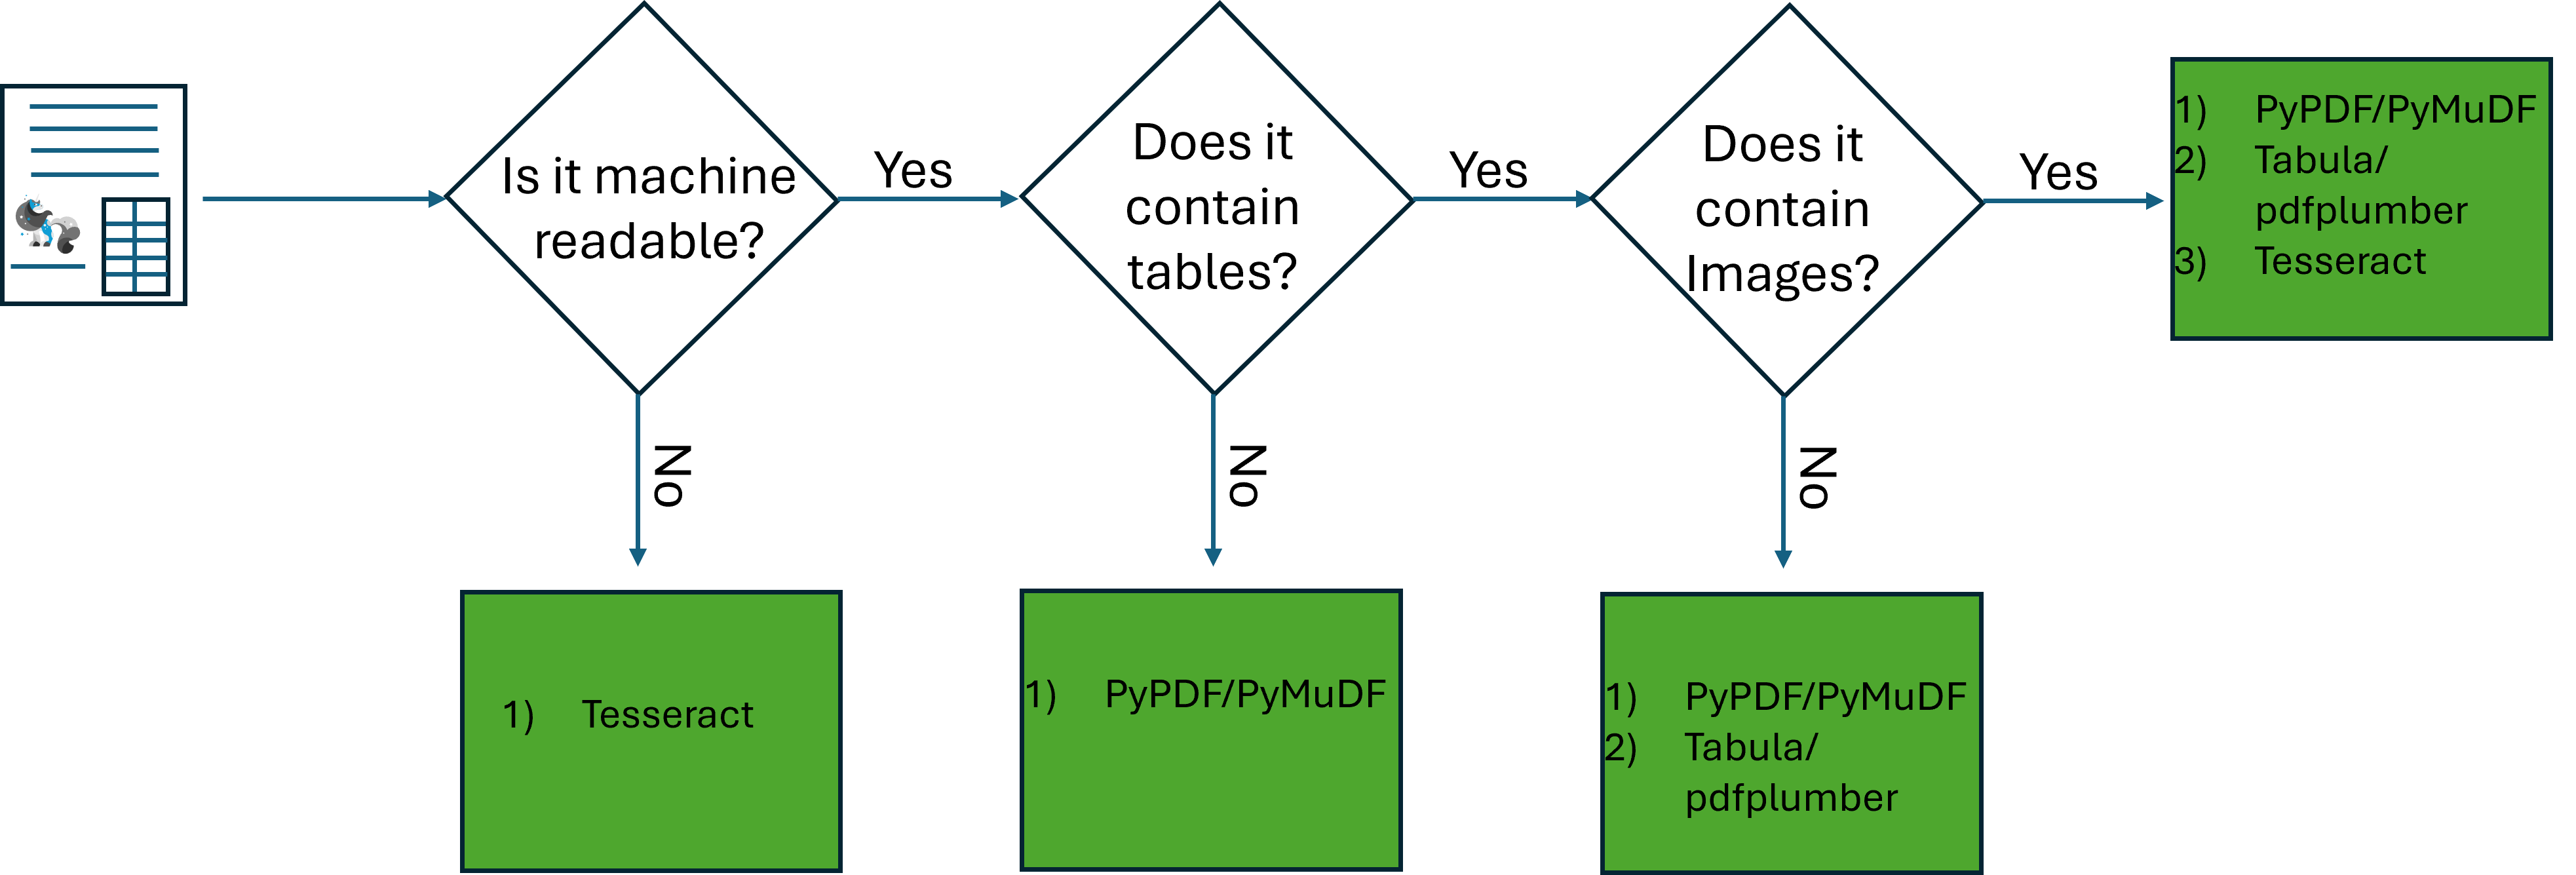


## Environment Setup
I have two example PDFs. One single coulmn and one multicolumn. 

In [28]:
single_column = 'single_column.pdf'
multi_column = 'multi_column.pdf'
#!pip install pypdf
#!pip install PyMuPDF

Single column           |  Multi Column
:-------------------------:|:-------------------------:
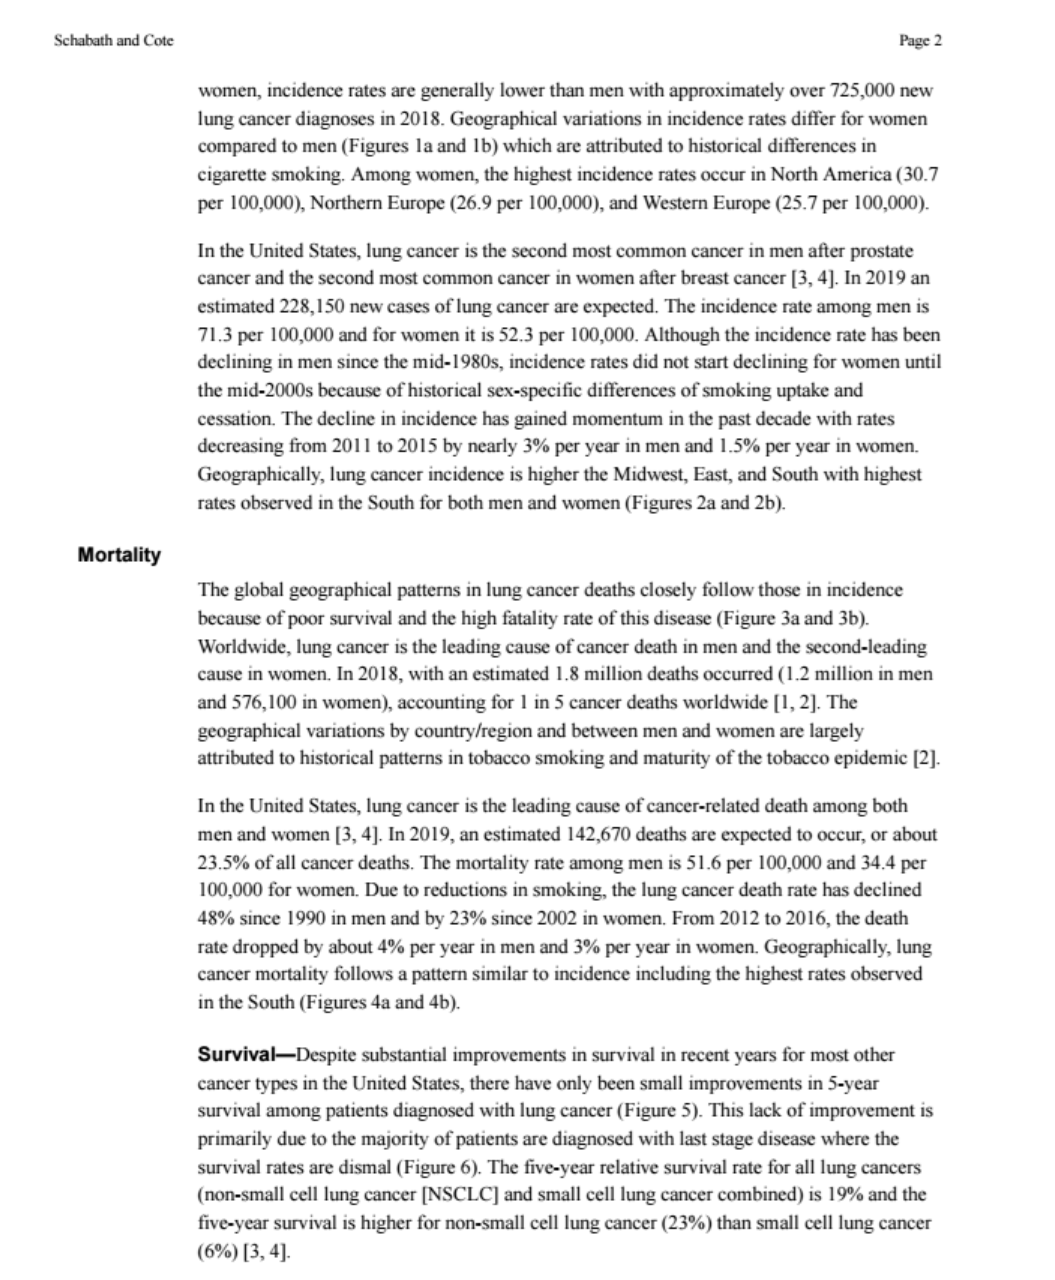 |  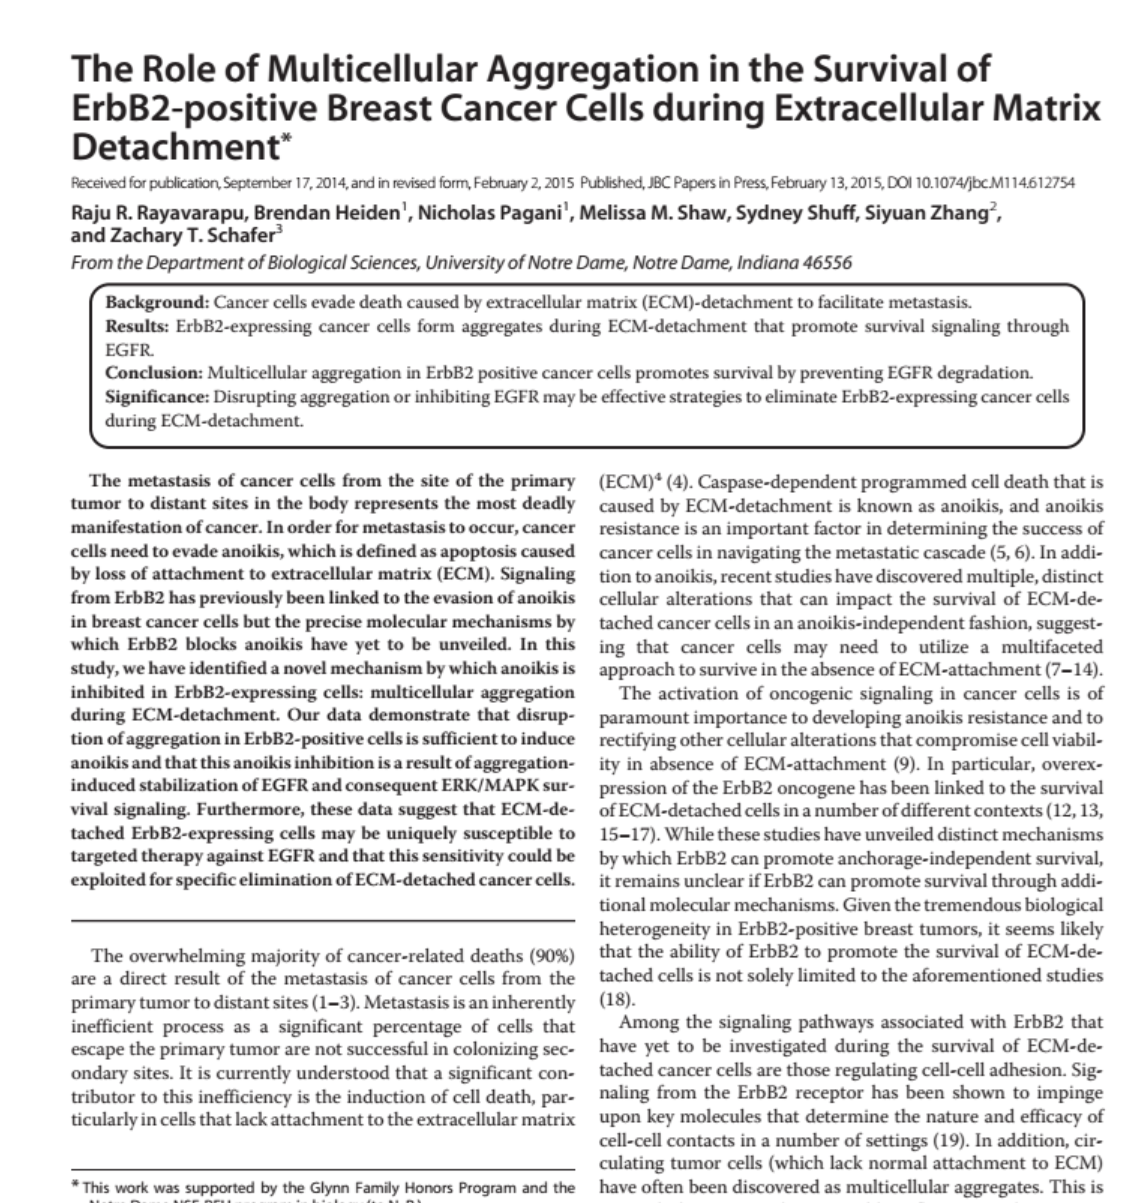

### PDF Text Extraction

#### PyPDF/PyPDF2
PyPDF has been around for a very long time. PyPDF2 was started to add some additional functionality and continue the development started in PyPDF. Recently, PyPDF2 has been merged with PyPDF and the new package is extremely powerful. I use PyPDF a lot and it is often used as the gold standard for text extraction for LLM pipelines. It is reasonably fast but can be very accurate (as accurate as you can be with PDF text extraction) 

#### PyMuPDF
PyMuPDF relies on fitz which is a C engine that is fairly well developed. I usually use it as a backup to when PyPDF cannot read a PDF as PyPDF has a much more active community of developers right now. Sometimes I find that PyMuPDF makes some weird errors, especially when it is a multi-column PDF. These are often found in scientific papers. PyMuPDF is faster and can generally be a great choice. 

PyMuPDF imports as **fitz**

We will see this later, but the fitz engine can be used to help us pull data from images. 

##### Single Column PDF

PyPDF example

In [29]:
from pypdf import PdfReader
doc = PdfReader(single_column)
#Specific page that we need. 
page = doc.pages[0]
text = page.extract_text()
print(text)

Cancer Progress and Priorities: Lung Cancer
Matthew B. Schabath1,2,*, Michele L. Cote3,4
1Department of Cancer Epidemiology, H. Lee Moffitt Cancer Center and Research Institute, 
Tampa, Florida USA
2Department of Thoracic Oncology; H. Lee Moffitt Cancer Center and Research Institute, Tampa, 
Florida USA
3Wayne State University School of Medicine, Department of Oncology, Detroit, Michigan, USA
4Barbara Ann Karmanos Cancer Institute, Detroit, Michigan, USA.
Background
In the United States, lung cancer is the second most common diagnosed cancer and the leading 
cause of cancer-related death. Though tobacco smoking is the major risk factor accounting for 80 
to 90% of all lung cancer diagnoses, there are numerous other risk factors that have been identified 
as casually associated with lung cancer etiology. However, there are few causally-linked risk 
factors for lung cancer diagnosed among never smokers which, if considered a unique reportable 
category, is the 11th most common cancer and

PyMuPDF example (as fitz)

In [30]:
import fitz
doc = fitz.open(single_column)
page = doc.load_page(0)
page_to_text = page.get_text("text")
print(page_to_text)

Cancer Progress and Priorities: Lung Cancer
Matthew B. Schabath1,2,*, Michele L. Cote3,4
1Department of Cancer Epidemiology, H. Lee Moffitt Cancer Center and Research Institute, 
Tampa, Florida USA
2Department of Thoracic Oncology; H. Lee Moffitt Cancer Center and Research Institute, Tampa, 
Florida USA
3Wayne State University School of Medicine, Department of Oncology, Detroit, Michigan, USA
4Barbara Ann Karmanos Cancer Institute, Detroit, Michigan, USA.
Background
In the United States, lung cancer is the second most common diagnosed cancer and the leading 
cause of cancer-related death. Though tobacco smoking is the major risk factor accounting for 80 
to 90% of all lung cancer diagnoses, there are numerous other risk factors that have been identified 
as casually associated with lung cancer etiology. However, there are few causally-linked risk 
factors for lung cancer diagnosed among never smokers which, if considered a unique reportable 
category, is the 11th most common cancer and

Show explicit differences in string readings between the libraries

In [31]:
import difflib

# Use Differ to compare the strings
differ = difflib.Differ()
diff = differ.compare(text.splitlines(), page_to_text.splitlines())

# Join the result into a single string with line breaks
result = '\n'.join(diff)
print(result)
# Output the differences
#with open('diff_output.txt', 'w', encoding = "Latin1") as file:
#    file.write(result)

  Cancer Progress and Priorities: Lung Cancer
  Matthew B. Schabath1,2,*, Michele L. Cote3,4
  1Department of Cancer Epidemiology, H. Lee Moffitt Cancer Center and Research Institute, 
  Tampa, Florida USA
  2Department of Thoracic Oncology; H. Lee Moffitt Cancer Center and Research Institute, Tampa, 
  Florida USA
  3Wayne State University School of Medicine, Department of Oncology, Detroit, Michigan, USA
  4Barbara Ann Karmanos Cancer Institute, Detroit, Michigan, USA.
  Background
  In the United States, lung cancer is the second most common diagnosed cancer and the leading 
  cause of cancer-related death. Though tobacco smoking is the major risk factor accounting for 80 
  to 90% of all lung cancer diagnoses, there are numerous other risk factors that have been identified 
  as casually associated with lung cancer etiology. However, there are few causally-linked risk 
  factors for lung cancer diagnosed among never smokers which, if considered a unique reportable 
  category, is t

As we can see from the example in the DiffLib, some major differences between the twp libraries is that they handle line breaks differently. For most use cases it doesn't matter. However, let's look at how the two libraries handle actual content with the line break difference removed. 

In [43]:
import re

text_n = re.sub("\s+", " ", text)
page_to_text_n = re.sub("\s+", " ", page_to_text)

Let's use NLTK (Natural Language Tool Kit) to tokenize our sentences and then compare the first few tokens for text difference. 

In [45]:
import nltk
sent_text = nltk.sent_tokenize(text)
sent_page = nltk.sent_tokenize(page_to_text_n)

for i in range (5):
    print("-------")
    print(sent_text[i])
    print("+++++++")
    print(sent_page[i])
    print("-------")
    print(nltk.edit_distance(sent_text[i], sent_page[i]))

-------
Cancer Progress and Priorities: Lung Cancer
Matthew B. Schabath1,2,*, Michele L. Cote3,4
1Department of Cancer Epidemiology, H. Lee Moffitt Cancer Center and Research Institute, 
Tampa, Florida USA
2Department of Thoracic Oncology; H. Lee Moffitt Cancer Center and Research Institute, Tampa, 
Florida USA
3Wayne State University School of Medicine, Department of Oncology, Detroit, Michigan, USA
4Barbara Ann Karmanos Cancer Institute, Detroit, Michigan, USA.
+++++++
Cancer Progress and Priorities: Lung Cancer Matthew B. Schabath1,2,*, Michele L. Cote3,4 1Department of Cancer Epidemiology, H. Lee Moffitt Cancer Center and Research Institute, Tampa, Florida USA 2Department of Thoracic Oncology; H. Lee Moffitt Cancer Center and Research Institute, Tampa, Florida USA 3Wayne State University School of Medicine, Department of Oncology, Detroit, Michigan, USA 4Barbara Ann Karmanos Cancer Institute, Detroit, Michigan, USA.
-------
7
-------
Background
In the United States, lung cancer is 

##### Multicolumn PDF

In [46]:
from pypdf import PdfReader
doc = PdfReader(multi_column)
#Specific page that we need. 
page = doc.pages[0]
text = page.extract_text()
print(text)

The Role of Multicellular Aggregation in the Survival of
ErbB2-positive Breast Cancer Cells during Extracellular MatrixDetachment
*
Received for publication, September 17, 2014, and in revised form, February 2, 2015 Published, JBC Papers in Press, February 13, 2015, DOI 10.1074/jbc.M114.612754
Raju R. Rayavarapu, Brendan Heiden1, Nicholas Pagani1, Melissa M. Shaw, Sydney Shuff, Siyuan Zhang2,
and Zachary T. Schafer3
From the Department of Biological Sciences, University of Notre Dame, Notre Dame, Indiana 46556
Background: Cancer cells evade death caused by extracellular matrix (ECM)-detachment to facilitate metastasis.
Results: ErbB2-expressing cancer cells form aggregates during ECM-detachment that promote survival signaling through
EGFR.Conclusion: Multicellular aggregation in ErbB2 positive cancer cells promotes survival by preventing EGFR degradation.
Significance: Disrupting aggregation or inhibiting EGFR may be effective strategies to eliminate ErbB2-expressing cancer cells
durin

In [47]:
import fitz
doc = fitz.open(multi_column)
page = doc.load_page(0)
page_to_text = page.get_text("text")
print(page_to_text)

The Role of Multicellular Aggregation in the Survival of
ErbB2-positive Breast Cancer Cells during Extracellular Matrix
Detachment*
Received for publication,September 17, 2014, and in revised form, February 2, 2015 Published, JBC Papers in Press,February 13, 2015, DOI 10.1074/jbc.M114.612754
Raju R. Rayavarapu, Brendan Heiden1, Nicholas Pagani1, Melissa M. Shaw, Sydney Shuff, Siyuan Zhang2,
and Zachary T. Schafer3
From the Department of Biological Sciences, University of Notre Dame, Notre Dame, Indiana 46556
Background: Cancer cells evade death caused by extracellular matrix (ECM)-detachment to facilitate metastasis.
Results: ErbB2-expressing cancer cells form aggregates during ECM-detachment that promote survival signaling through
EGFR.
Conclusion: Multicellular aggregation in ErbB2 positive cancer cells promotes survival by preventing EGFR degradation.
Significance: Disrupting aggregation or inhibiting EGFR may be effective strategies to eliminate ErbB2-expressing cancer cells
during

#### PDF Text Extractor Choice Flow

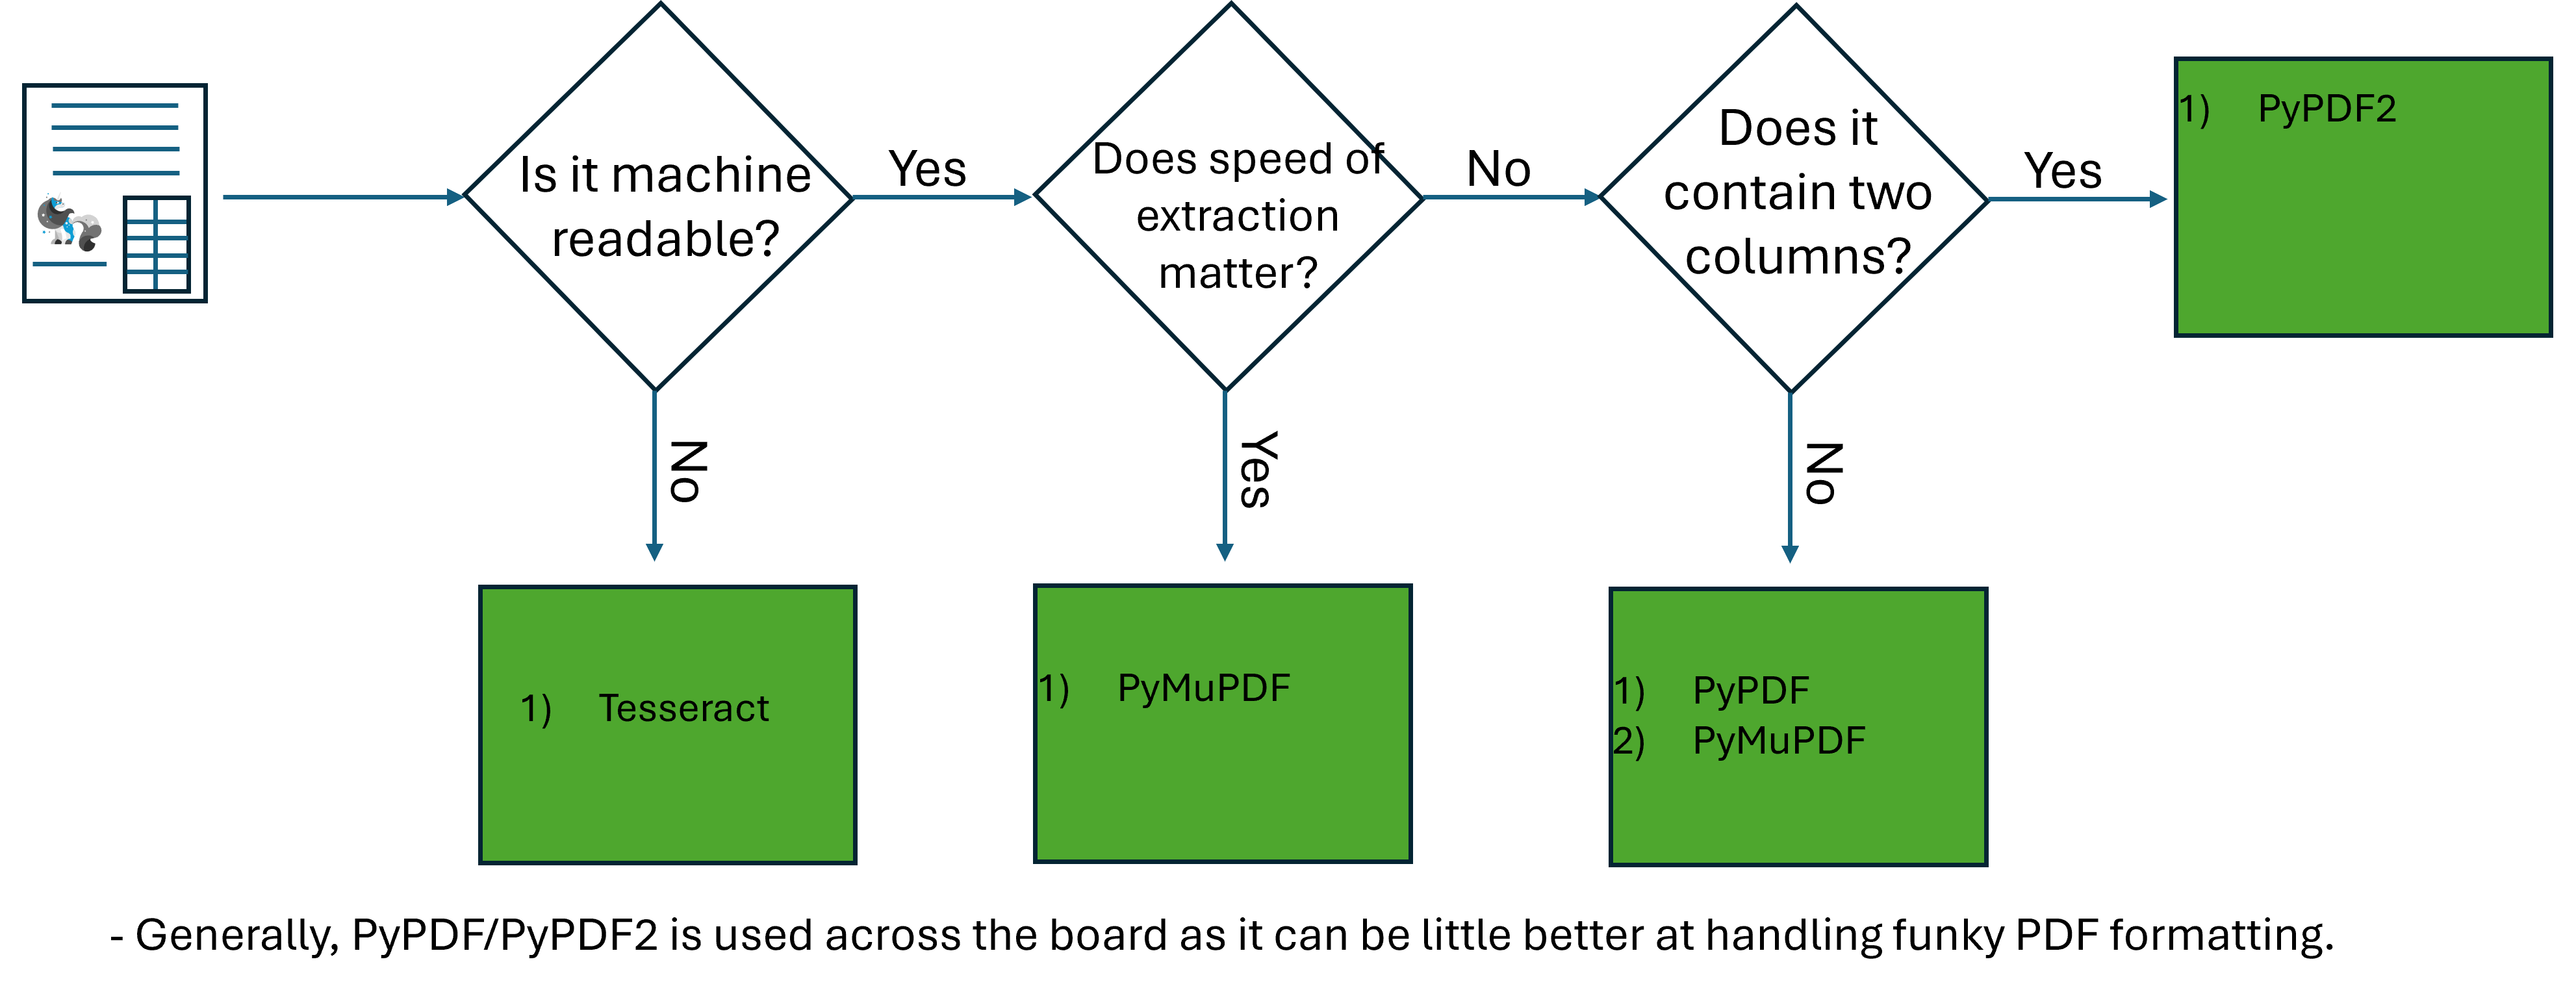

### Table Extraction

There are a lot different tools out there for table extraction. Some are much better than others. Here we will look at two of my favorite ones, Tabula and PDFPlumber

#### Tabula
Tabula requires a configured Java Runtime Environment to work well. I use Amazon's Coretto. 
**https://aws.amazon.com/corretto**

This stackoverflow thread will help you understand JRE configuration. 
**https://stackoverflow.com/questions/54817211/java-command-is-not-found-from-this-python-process-please-ensure-java-is-inst**

Make sure that Coretto is in your PATH or Tabula will not work. 

When you pass the all parameter to tabula, it pulls every table as its own indexed df. This way you can pull specific tables by order or split out each table as its own csv/table for later use. 

In [51]:
import tabula
dfs = tabula.read_pdf(single_column, pages='all')
print(dfs)
df = pd.concat(dfs)
display(df)

[      Gene Alteration type Frequency in NSCLC
0     EGFR        Mutation             10–35%
1     KRAS        Mutation             15–25%
2    FGFR1   Amplification                20%
3     PTEN        Mutation               4–8%
4     DDR2        Mutation                ~4%
5      ALK   Rearrangement               3–7%
6     HER2        Mutation               2–4%
7      MET   Amplification               2–4%
8     BRAF        Mutation               1–3%
9   PIK3CA        Mutation               1–3%
10    AKT1        Mutation                 1%
11    MEK1        Mutation                 1%
12    NRAS        Mutation                 1%
13     RET   Rearrangement                 1%
14    ROS1   Rearrangement                 1%]


,Gene,Alteration type,Frequency in NSCLC
0,EGFR,Mutation,10–35%
1,KRAS,Mutation,15–25%
2,FGFR1,Amplification,20%
3,PTEN,Mutation,4–8%
4,DDR2,Mutation,~4%
5,ALK,Rearrangement,3–7%
6,HER2,Mutation,2–4%
7,MET,Amplification,2–4%
8,BRAF,Mutation,1–3%
9,PIK3CA,Mutation,1–3%


Tabula really hates it when you pass a multi column text as it treats each column as a column in a table. For this reason, it might be useful to try a different table engine or specifically target the page with the table for the PDF you are extracting. 

In [50]:
import pandas as pd
dfs = tabula.read_pdf(multi_column, pages='all')
print(dfs)
df = pd.concat(dfs)
display(df)

[                                       The metastasis   of          cancer  \
0   tumor to distant sites in the body represents ...  NaN             NaN   
1   manifestation of cancer. In order for metastas...  NaN             NaN   
2   cells need to evade anoikis, which is defined ...  NaN             NaN   
3   by loss of attachment to extracellular matrix ...  NaN             NaN   
4   from ErbB2 has previously been linked to the e...  NaN             NaN   
5   in breast cancer cells but the precise molecul...  NaN             NaN   
6                                  which ErbB2 blocks  NaN         anoikis   
7   study, we have identified a novel mechanism by...  NaN             NaN   
8                       inhibited in ErbB2-expressing  NaN             NaN   
9                              during ECM-detachment.  NaN             Our   
10  tion of aggregation in ErbB2-positive cells is...  NaN             NaN   
11  anoikis and that this anoikis inhibition is a ...  NaN     

,The metastasis,of,cancer,cells,from,the,site,of.1,the.1,primary,...,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,"cer Cell 25, 282–303","104, 3787–3792",46.,"Tsai, J. H., Donaher, J. L., Murphy, D. A., Chau, S., and Yang, J.",(2012)
0,tumor to distant sites in the body represents ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,manifestation of cancer. In order for metastas...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,"cells need to evade anoikis, which is defined ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,by loss of attachment to extracellular matrix ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,from ErbB2 has previously been linked to the e...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,"D. L., and Frisch, S. M. (2011) A pathway for ...",54.0,"Witta, S. E., Gemmill, R. M., Hirsch, F. R., C...",NaN
27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,tivity by E-cadherin and epithelial-to-mesench...,NaN,"Ravdel, L., Helfrich, B., Dziadziuszko, R., Ch...",NaN
28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,"Biol. 31, 4036 – 4051",NaN,"Baron, A., Franklin, W., Drabkin, H. A., Girar...",NaN
29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,"Ocaña, O. H., Córcoles, R., Fabra, A., Moreno-...",NaN,"J. D., and Bunn, P. A., Jr. (2006) Restoring E...",NaN


#### PdfPlumber

PDFPlumber does not need a configured JRE to function. I have used this in instances where I do not have acces to Java or want to keep my code to not being reliant on anything that can't just be pip-ed. 

In [52]:
#!pip install pdfplumber
import pdfplumber

table_settings={"vertical_strategy": "text", 
                "horizontal_strategy": "text"}

with pdfplumber.open(single_column) as pdf:
    page = pdf.pages[33]    
    table = page.extract_table(table_settings = table_settings)
    
    df = pd.DataFrame(table)

    display(df)

,0,1,2,3
0,Aut,,,
1,h,Gene,Alteration type Freque,ncy in N
2,o,,,
3,r,EGFR,Mutation,10–35%
4,,,,
5,M,,,
6,a,KRAS,Mutation,15–25%
7,n,,,
8,u,FGFR1,Amplification,20%
9,s,,,


Much like with Tabula, pdfplumber and many of the other PDF miners panic when they are exposed to multi-column PDFs. This can be mitigated by knowning where the table is in the document but if not, you end up with each column of your text and each new line as a columns and rows in a psuedo-table. 

There is a lot of depth to the configuration of both of these tools and your preference will depend on what you are attempting to do with data and what you have to handle. 

In [53]:
table_settings={"vertical_strategy": "text", 
                "horizontal_strategy": "text"}

with pdfplumber.open(multi_column) as pdf:
    total_pages = len(pdf.pages)
    for page in range(total_pages):
        page = pdf.pages[page]    
        table = page.extract_table(table_settings = table_settings)
    
        df = pd.DataFrame(table)

        display(df)

,0,1
0,,"THEJOURNALOFBIOLOGICALCHEMISTRYVOL.290,NO.14,p..."
1,,©2015byTheAmericanSocietyforBiochemistryandMol...
2,,
3,The Role of Multicellular Aggre,gation in the Survival of
4,ErbB2-positive Breast Cancer Ce,lls during Extracellular Matrix
...,...,...
61,"beaddressed:Dept.ofBiologicalSciences,Universi...","mesenchymaltransition;MET,mesenchymaltoepithel..."
62,"GalvinLifeScienceCenter,NotreDame,IN46556.Tel....","circulatingtumorcell;MC,methylcellulose;EGFR,e..."
63,574-631-7413;E-mail:zschafe1@nd.edu.,receptor.
64,,


,0,1
0,,AggregationInducedAnoikisEvasion
1,,
2,are oftentimes driven by ErbB2-mediated signal...,"48h,imageswereacquired,andcellswereharvested,w..."
3,"more,theoncogeneTrkB,whichhasbeenshowntostimulate","twice with ice-cold PBS, and then lysed in 1% ..."
4,survivalsignalingpathways(includingthosealsodo...,supplemented with protease inhibitors (leupept...
...,...,...
58,catesareshown.,shown.
59,Western Blot Analysis—Cells were plated at a d...,Cytochrome c Release Assay—Cytosolic cell extr...
60,"400,000cellsperwellin6-wellpoly-HEMA-coatedpla...",mitochondria were prepared as described previo...
61,,


,0,1
0,AggregationInducedAnoikisEvasion,
1,,
2,"Briefly,cellswereharvested,washedtwiceinice-co...","viously(28),ErbB2expressioninMCF-10Acells(10A:..."
3,"lysedinlysisbuffer(250mMsucrose,20mMHEPES-KOH(pH",sufficient to abrogate the induction of anoiki...
4,"7.4),10mMKCl,1.5mMNa-EGTA,1.5mMNa-EDTA,1mM",grown in the absence of ECM-attachment for 48 ...
...,...,...
61,"tionofanoikis,weutilizedMCF-10Acells,anon-tumo...",expressionin10A:Ctrlcellsdidnotreduceviability...
62,mammaryepithelialcelllinethathasbeenwidelyused...,TofurtherassesstheroleofE-cadherininpromotinga...
63,"thebiologyofanoikis(9,12,26,27).Ashasbeenobser...","suppression, we disrupted cellular aggregation..."
64,,


,0
0,FIGURE1.OverexpressionofErbB2resultsinanoikiss...
1,cellsoverexpressingErbB2(10A:ErbB2)weregrownin...
2,"foldchangeoverattached.B,10A:Ctrl,10A:ErbB2,an..."
3,conditionsfor48h.Representativeimagesareshown(...
4,indicatedEMTmarkerswasassessedviaimmunoblottin...
5,cellswereplatedin1%weight/volume(w/v)MCtodisru...
6,"E,10A:ErbB2cellswereplatedinMC,andcellularviab..."
7,relativecelldeathwasmeasuredafter48hinECM-deta...
8,"representS.D.,andpvaluesweredeterminedusingatw..."
9,


,0
0,AggregationInducedAnoikisEvasion
1,
2,FIGURE2.E-cadherinengagementisnecessaryforaggr...
3,transductiontoexpressaMyc-taggeddominant-negat...
4,control.a.u.isdefinedasfoldchangeovercontrol.B...
5,"disruptionuponECM-detachment.C,caspaseactivati..."
6,viabilitywasmeasuredupon48hofECM-detachmentin1...
7,with1(cid:2)g/mlE-cadherinengagementantibody(E...
8,measured.Representativeimage(left)isshown(10(c...
9,antibody(Eng.Ab.)orvehicle(Veh)for48htodisrupt...


,0
0,AggregationInducedAnoikisEvasion
1,
2,FIGURE3.Aggregateformationpromotesanoikisevasi...
3,ErbB2inBT474cellswasconfirmedbyimmunoblottingf...
4,"controlandsiErbB2cellsbyImageJ.B,E-cadherinpos..."
5,andcaspaseactivationwasmeasuredat48h.a.u.isdef...
6,"detachedconditionsandtreatedwithMC,andcaspasea..."
7,transducedwithlentiviralshRNAtargetingeitherpL...
8,forE-cadherin(D).(cid:4)-Actinisusedasaloading...
9,"overshpLKOMC.F,expressionoftheindicatedEMTfact..."


,0,1
0,AggregationInducedAnoikisEvasion,
1,,
2,,uncoveranychangesintheproteinlevelsofthesekeyr...
3,,tors(Fig.6B).Otherinvestigationsfocusingonther...
4,,Bcl-2familymembersbyERKdiscoveredthatERKcanblock
...,...,...
61,"(e.g.Bim)oranti-apoptotic(e.g.Bcl-2,Bcl-XL,Mcl...",demonstrate that ErbB2-expressing breast cance...
62,"previouslylinkedtoanoikis.Interestingly,despit...","large, multicellular aggregates when detached ..."
63,"chrome c release upon aggregate disruption, we...",andthattheseaggregatesplayacriticalroleinanoik...
64,,


,0
0,FIGURE5.EGFRstabilizationbyaggregateformationd...
1,"measuredbyimmunoblotin10A:ErbB2(A),BT-474(B),o..."
2,"control.D,SKBR3cellswitheitheremptyvectororE-c..."
3,E-cadherinexpressionwasalsoconfirmedbyimmunobl...
4,immunofluorescencein10A:ErbB2cellsincontrol(n(...
5,"EGFR(green).NucleiwerestainedwithDAPI(blue),an..."
6,"AppliedPrecisionDeltaVisionOMX,andcolocalizati..."
7,"barsrepresentS.E.F,10A:ErbB2cellsweregrowninMC..."
8,measuredat48hinECM-detachment.a.u.isdefinedasf...
9,and(cid:3)-tubulinwereusedasloadingcontrolsat4...


,0
0,AggregationInducedAnoikisEvasion
1,
2,FIGURE6.AggregatedisruptioninECM-detachmentres...
3,wereanalyzedforcytochromecand(cid:4)-actin(loa...
4,"Bcl-2,Bcl-XL,andMcl-1)levelsweremeasuredbyimmu..."
5,"usedasloadingcontrols.C,serine-phosphorylatedB..."
6,48hofECM-detachment.(cid:4)-Actinwasusedasaloa...
7,presenceorabsenceofMCortreatedwithDMSOor3(cid:...
8,"transfectedinto10A:ErbB2cells,andsuccessoftran..."
9,activationwasmeasuredfortheindicatedcellsplate...


,0
0,FIGURE8.Modelforaggregate-mediatedEGFRstabiliz...
1,aggregate-mediatedECM-detachedsurvivalinErbB2-...
2,overexpressingcells.
3,
4,themetastaticcascadewhendisseminatedcancercell...
5,survive in foreign matrix environments. Furthe...
6,studies have unequivocally demonstrated the pr...
7,E-cadherininapercentageofbothprimarybreasttumo...
8,distant metastases (48) and a correlation betw...
9,aggregationandsuccessfulmetastasiswasfirstpubl...


,0,1,2,3
0,,,,"cerCell25,282–303"
1,Ack,"nowledgments—We thank Cassandra Buchheit, Kels...",19.,"Higgins,M.J.,andBaselga,J.(2011)Targetedtherap..."
2,Josh,"uaMason,AmyLeliaert,KelseaHosoda,VeronicaSchaf...",,"J.Clin.Invest.121,3797–3803"
3,the,restoftheSchaferlaboratoryforhelpfulcommentsan...,20.,"Moss,N.M.,Barbolina,M.V.,Liu,Y.,Sun,L.,Munshi,..."
4,We,thankLisaCheckleyandMichaelFerdigatNotreDamefo...,,M.S.(2009)Ovariancancercelldetachmentandmultic...
...,...,...,...,...
63,,(2014)Anoikisevasionininflammatorybreastcancer...,,factorreceptorcausedbytumor-derivedE-cadherinm...
64,,Bim-EL sequestration. Cell Death Differ Dec 19...,,"Res.68,707–714"
65,,2014.1209,37.,"Schmelzle,T.,Mailleux,A.A.,Overholtzer,M.,Carr..."
66,18.,"Arteaga,C.L.,andEngelman,J.A.(2014)ERBBrecepto...",,"N.L.,Lightcap,E.S.,Veiby,O.P.,andBrugge,J.S.(2..."


,0,1,2,3
0,,maryepithelialanoikisandmorphogenesis.Proc.Nat...,,"transitioninducerPrrx1.CancerCell22,709–724"
1,,"104,3787–3792",46.,"Tsai,J.H.,Donaher,J.L.,Murphy,D.A.,Chau,S.,and..."
2,38.,"Whelan,K.A.,Schwab,L.P.,Karakashev,S.V.,Franch...",,Spatiotemporalregulationofepithelial-mesenchym...
3,,"G.J.,Seagroves,T.N.,andReginato,M.J.(2013)Theo...",,tialforsquamouscellcarcinomametastasis.CancerC...
4,,(ERBB2)requiresthehypoxia-induciblefactorHIF-1...,47.,"Chao,Y.L.,Shepard,C.R.,andWells,A.(2010)Breast..."
5,,"growthandanoikisresistance.J.Biol.Chem.288,158...",,re-expressE-cadherinduringmesenchymaltoepithel...
6,39.,"Weigel,K.J.,Jakimenko,A.,Conti,B.A.,Chapman,S....",,"tion.Mol.Cancer9,179"
7,,"Leevy,W.M.,Champion,M.M.,andSchafer,Z.T.(2014)...",48.,"Kowalski,P.J.,Rubin,M.A.,andKleer,C.G.(2003)E-..."
8,,IGFBPs Regulate Breast Cancer Cell Anoikis. Mo...,,in primary carcinomas of the breast and its di...
9,,855–866,,"CancerRes.5,R217–R222"


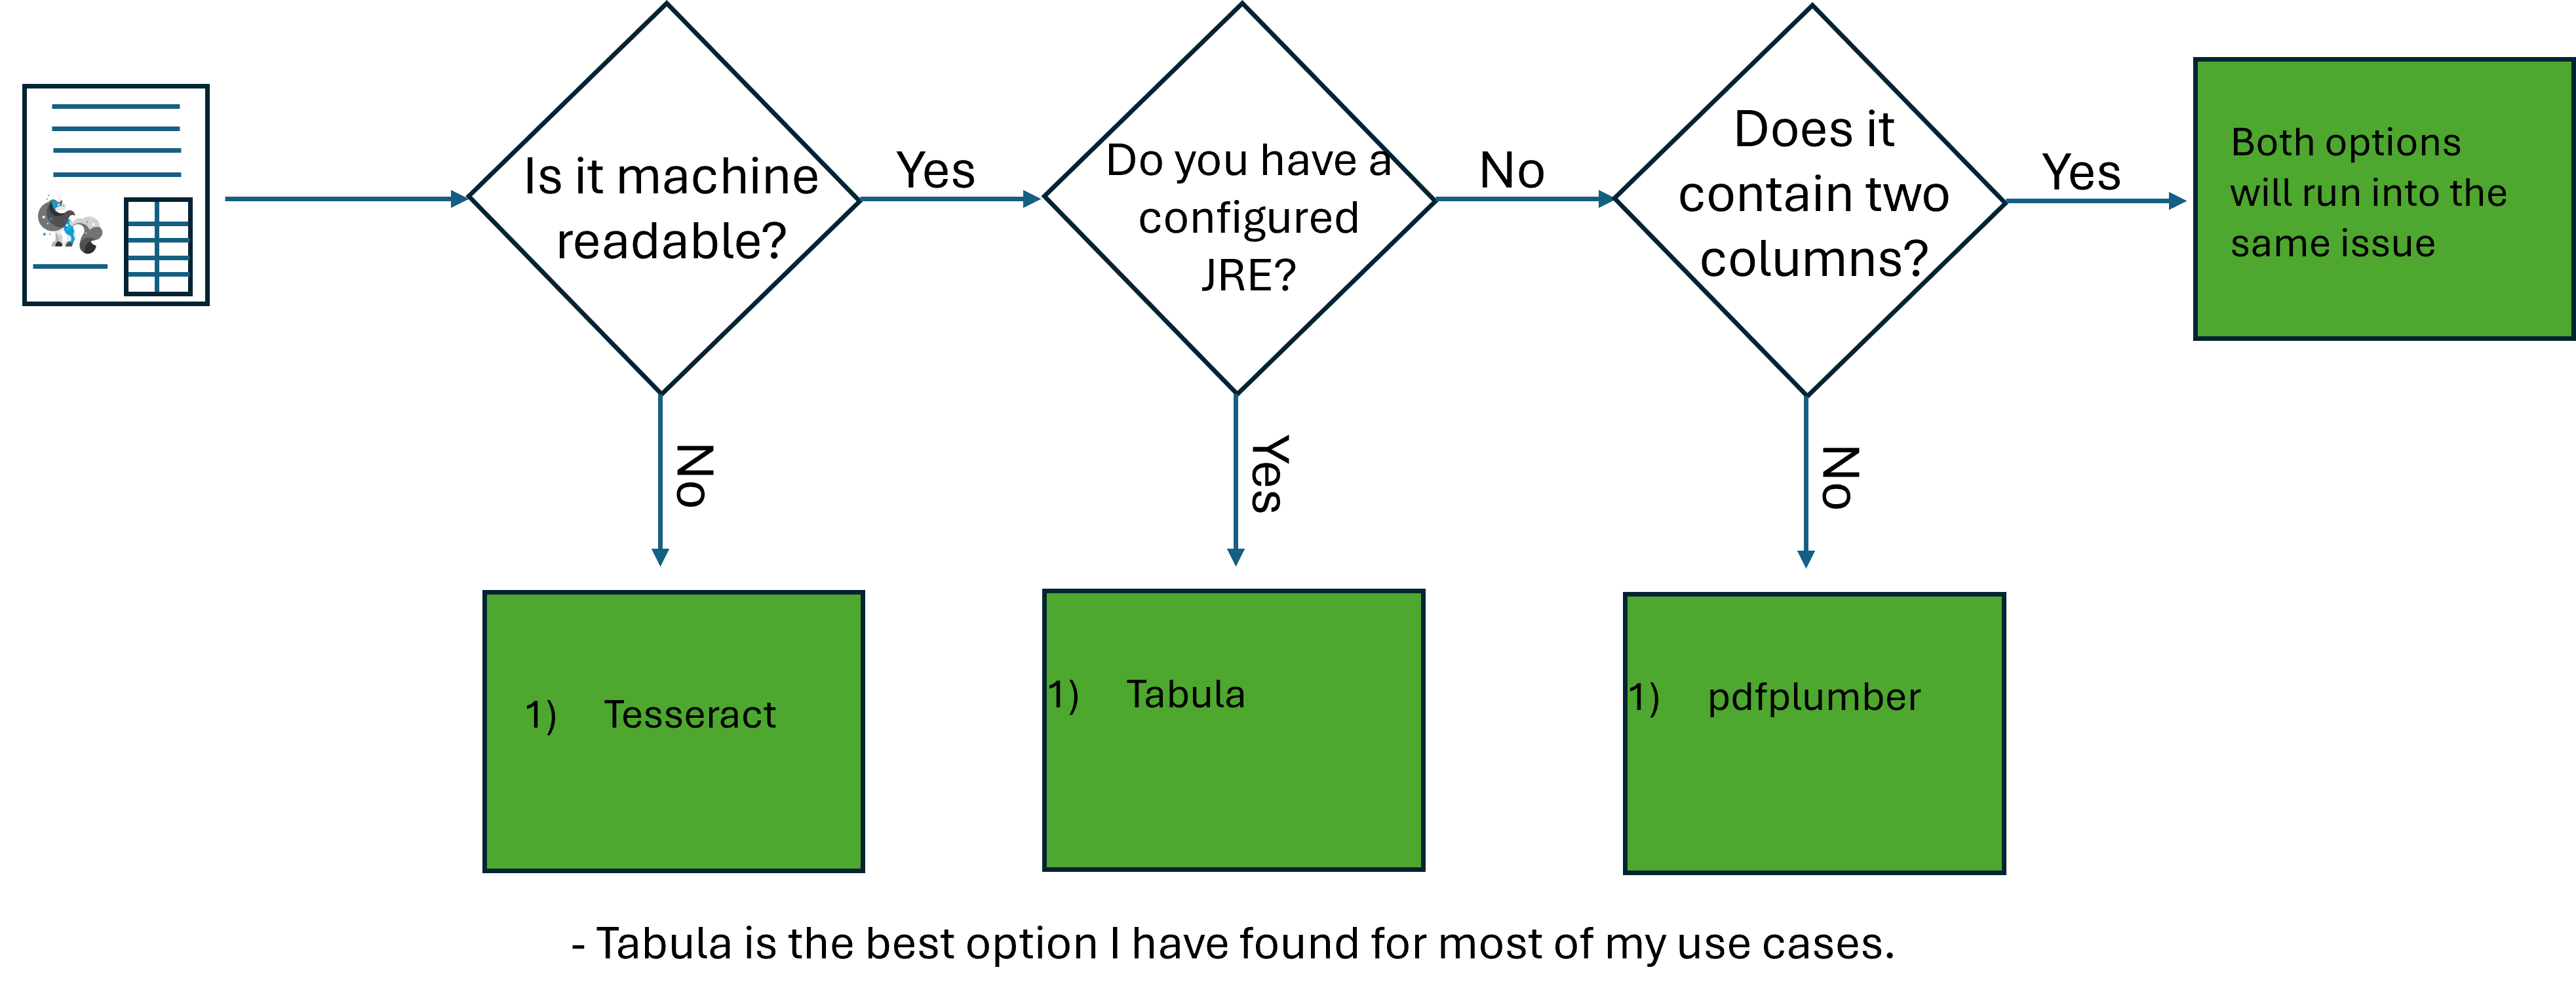

### OCR for Text Extraction

#### Tesseract
Tesseract is an open source Optical Character Recognition engine. It is fast, powerful and fairly lightweight. It was built in collaboration with reserachers from Google as well as academic institutions. 

To get tesseract to work, you need to install the tesseract OCR engine: 
**https://github.com/UB-Mannheim/tesseract/wiki**

You will also need to install pytesseract and OpenCV to help extract the images to run the OCR.

##### Extract the Image for OCR
We will use fitz to pop the image out of the PDF so that we can point the OCR engine at it. 

In [54]:
import fitz
doc = fitz.open(single_column)
img_page = doc.load_page(28)
pix = img_page.get_pixmap()
pix.save('image.png')
doc.close()

We will target the extracted image to pull the text. 

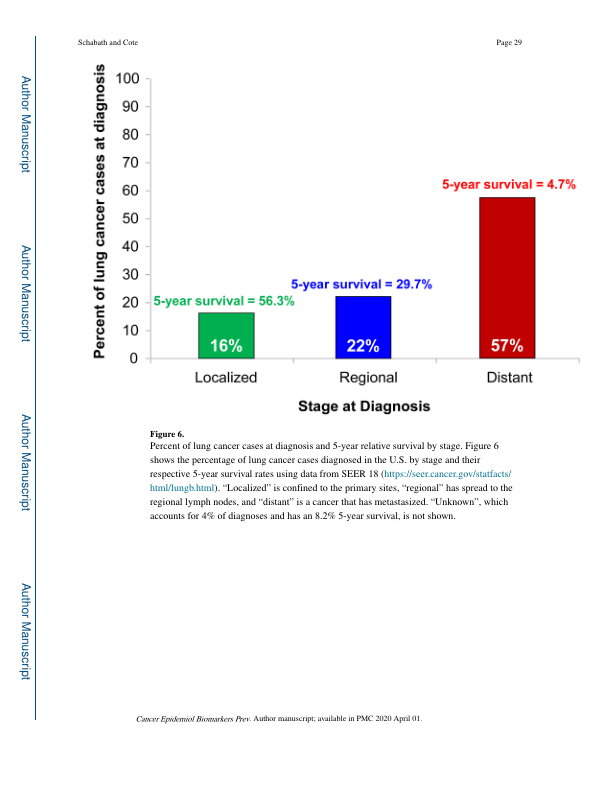

In [55]:
import cv2 
import pytesseract
img = cv2.imread('image.png')
custom_config = r'--oem 3 --psm 6'
pytesseract.pytesseract.tesseract_cmd = r'C:\Program Files\Tesseract-OCR\tesseract.exe'
text = pytesseract.image_to_string(img, config=custom_config)
print(text)

2
z 3 100
| be
Hy = 80
5 =
E g 70
8 60 5-year survival = 4.7%
i 50
40
= = 5-year survival = 29.7%
z = 20. Syear survival = 56.9%
* é 16% 22% 57%
oO
Localized Regional Distant
Stage at Diagnosis
g Figure 6.
g Percent of lng cancer caer tdagnais and 5-year eltiv survival by tage. Figure 6
~ accounts for 4% of diagnoses and has an 8.2% 5-year survival, is not shown.
z
=



## Putting it all together.
I created a document using an LLM and we will extract the data out of it using the flow that I laid out.

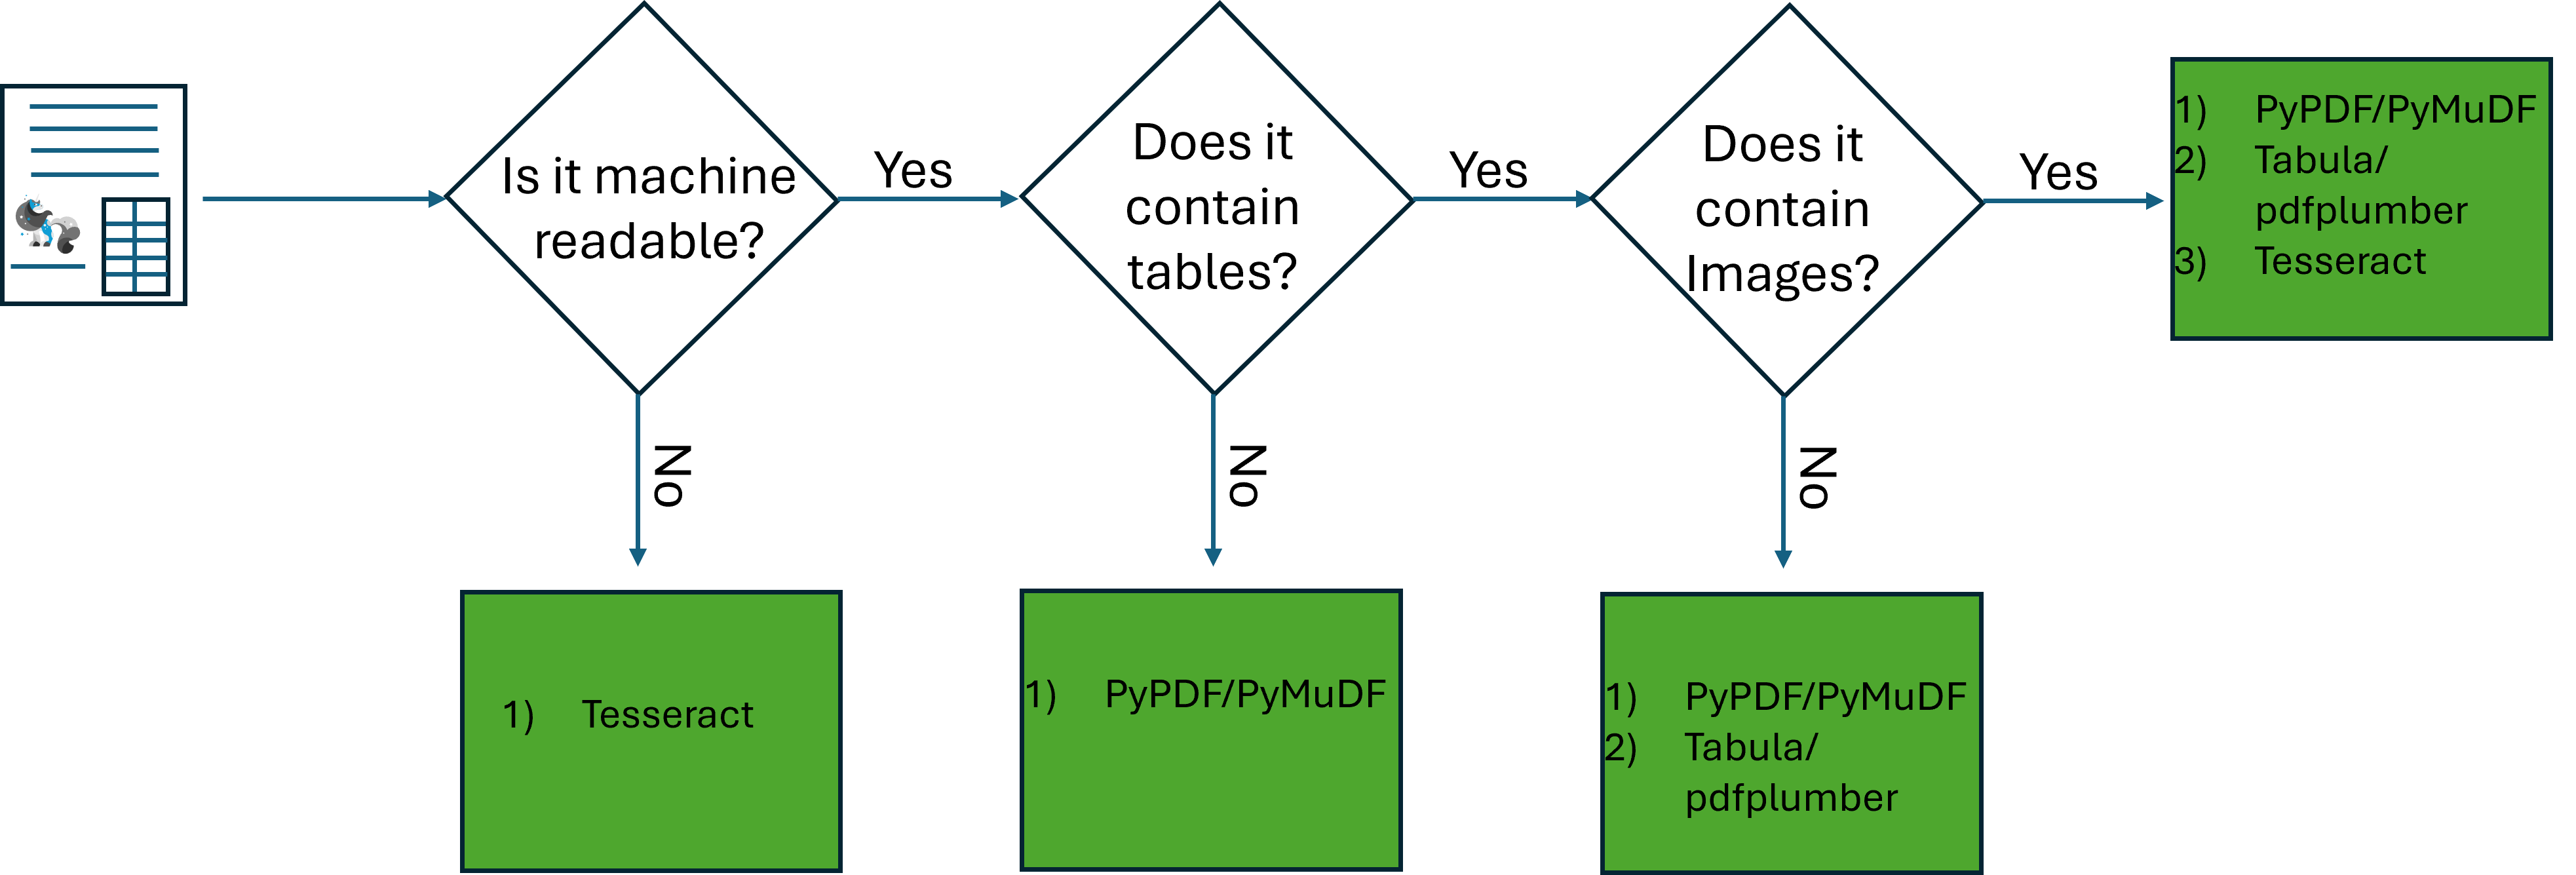

In [56]:
def pdf_to_txt(file):
    import fitz
    import re
    page_num = 0
        
    file_name = (file.rsplit('\\', 1)[1]).rsplit('.', 1)[0]
    out_path = file.rsplit("\\", 1)[0]
    print("Converting: " + file_name)
    
    with fitz.open(file) as doc:      
        text = ""
        for page in doc:
            page_text = ""
            print(page_num)
            page_text = page.get_text()
            tess_test_str = re.sub(r"[\n\t\s]*", "", page_text)
            
            #if len(tess_test_str.replace(" ", "")) > 0:
            if len(tess_test_str) > 0:
                text = text + '\n' + page_text
            else:
                print("to the OCR pipe")
                text = text + '\n' + tesseract_ocr(image_extract(page_num, file, out_path, file_name))
                
            page_num = page_num + 1
                          
    out_path_txt = out_path + "\\" + file_name + '.txt'
    with open(out_path_txt, "w", encoding="utf-8") as text_file:
        text_file.write(text)
        
    table_extract(file, out_path, file_name)
    

def image_extract(page_num, file, out_path, file_name):
    import fitz
    doc = fitz.open(file)
    img_page = doc.load_page(page_num)
    pix = img_page.get_pixmap()
    img_file_name = file_name + '_' + str(page_num) + ".png"
    output = out_path + "\\" + img_file_name
    pix.save(output)
    doc.close()
    return(output)

def tesseract_ocr(output):
    import cv2 
    import pytesseract
    img = cv2.imread(output)
    custom_config = r'--oem 3 --psm 6'
    pytesseract.pytesseract.tesseract_cmd = r'C:\Program Files\Tesseract-OCR\tesseract.exe'
    text = pytesseract.image_to_string(img, config=custom_config)
    return text
    
def table_extract(file, out_path, file_name):
    import tabula
    out_path_csv = out_path + '\\' + file_name +'.csv'
    tabula.convert_into(file, out_path_csv, output_format="csv", pages="all")

In [57]:
file = r"C:\Users\rajur\OneDrive\Documents\frederick_text_extract_session\MD_tess_doc.pdf"

In [58]:
pdf_to_txt(file)

Converting: MD_tess_doc
0
1
to the OCR pipe
2
